<a href="https://colab.research.google.com/github/SurajTandel/TwitterAnalysis/blob/main/twitterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import datetime as dt  
import re  
!python -m spacy download en_core_web_lg
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
!pip install tweepy
import tweepy

In [4]:
# Fill the required fields from developer twitter account
consumer_key=""
consumer_secret=""
access_token=""
access_token_secret=""

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [62]:
number_of_tweets = 5000
tweets = []
for i in tweepy.Cursor(api.search, q="chelsea", tweet_mode="extended").items(number_of_tweets):
  tweets.append(i.full_text)


In [63]:
lines = list()
for line in tweets:    
    words = line.split()
    for w in words: 
       lines.append(w)

In [64]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)


In [65]:
#Removing all Stop Words

stem = []

for word in lines2:
    if word not in nlp.Defaults.stop_words:
      if(len(word) > 1 and word != "RT" and word != "Chelsea"):
        stem.append(word)

len(stem)

60950

In [66]:
df = pd.DataFrame(stem)
df = df[0].value_counts()

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


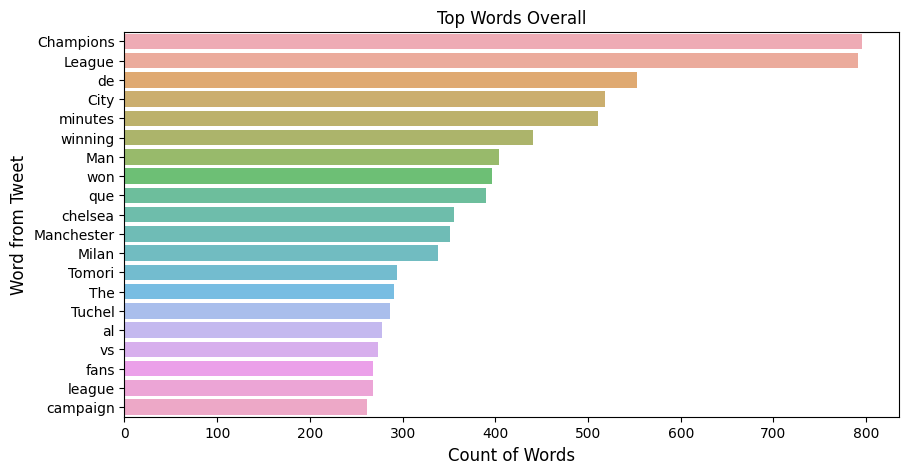

In [67]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [68]:
str1 = " " 
stem2 = str1.join(stem)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


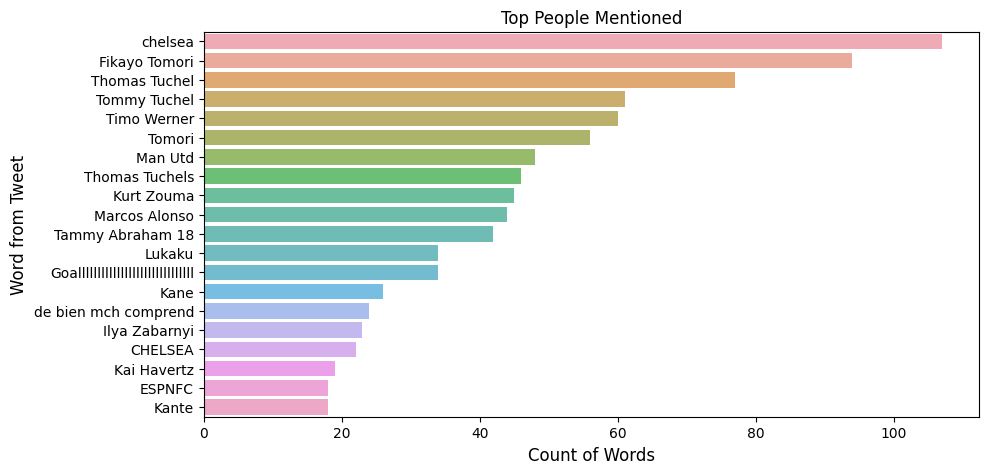

In [69]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()